Imports

# Part 1 : Using CNN from Keras

In [1]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install tensorflow
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_test = pd.read_csv("/Users/anthonyivanier/Desktop/Ensae/3A/Advanced Machine Learning/Projet CNN/archive/sign_mnist_test/sign_mnist_test.csv")
df_train = pd.read_csv("/Users/anthonyivanier/Desktop/Ensae/3A/Advanced Machine Learning/Projet CNN/archive/sign_mnist_train/sign_mnist_train.csv")

In [4]:
df_test.shape

(7172, 785)

Data

In [5]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_label=df_train['label']
train_label.head()
trainset=df_train.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [9]:
test_label=df_test['label']
X_test=df_test.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [10]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [11]:
X_test=X_test.values.reshape(-1,28,28,1)

In [12]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


## Data augmentation :

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 20,
                                  horizontal_flip=True)

X_test=X_test/255



''' more complexe data augmentation ?
'''

" more complexe data augmentation\ntrain_datagen = ImageDataGenerator(rescale = 1./255,\n                                  rotation_range = 0,\n                                  height_shift_range=0.2,\n                                  width_shift_range=0.2,\n                                  shear_range=0,\n                                  zoom_range=0.2,\n                                  horizontal_flip=True,\n                                  fill_mode='nearest')\n\nX_test=X_test/255\n"

In [14]:
y_train[0],y_train[1],y_train[2],y_train[4]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]))

Text(0.5, 1.0, 'label: 13  letter: N')

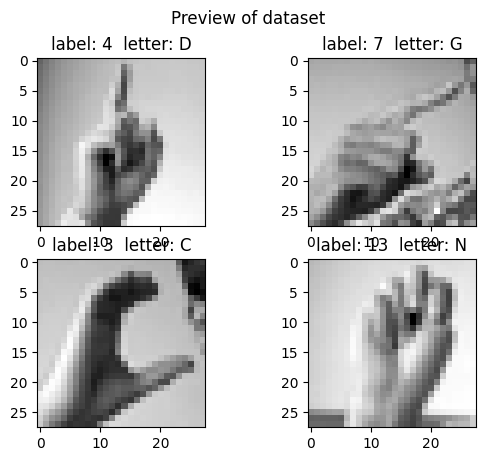

In [15]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 4  letter: D')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 7  letter: G')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 3  letter: C')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: N')

## CNN

In [16]:
# Define the model
model = Sequential()

# First block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(24, activation='sigmoid'))  

# Compile the model (assuming binary crossentropy and Adam optimizer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

Epoch 1/35
138/138 [==============================] - 11s 75ms/step - loss: 0.2345 - accuracy: 0.0416 - val_loss: 0.1791 - val_accuracy: 0.0290
Epoch 2/35
138/138 [==============================] - 10s 75ms/step - loss: 0.1875 - accuracy: 0.0453 - val_loss: 0.1768 - val_accuracy: 0.0321
Epoch 3/35
138/138 [==============================] - 10s 75ms/step - loss: 0.1775 - accuracy: 0.0768 - val_loss: 0.1573 - val_accuracy: 0.1484
Epoch 4/35
138/138 [==============================] - 11s 77ms/step - loss: 0.1500 - accuracy: 0.1971 - val_loss: 0.1174 - val_accuracy: 0.4187
Epoch 5/35
138/138 [==============================] - 11s 79ms/step - loss: 0.1173 - accuracy: 0.3825 - val_loss: 0.0726 - val_accuracy: 0.6475
Epoch 6/35
138/138 [==============================] - 11s 82ms/step - loss: 0.0891 - accuracy: 0.5524 - val_loss: 0.0534 - val_accuracy: 0.7557
Epoch 7/35
138/138 [==============================] - 11s 79ms/step - loss: 0.0706 - accuracy: 0.6570 - val_loss: 0.0411 - val_accuracy:

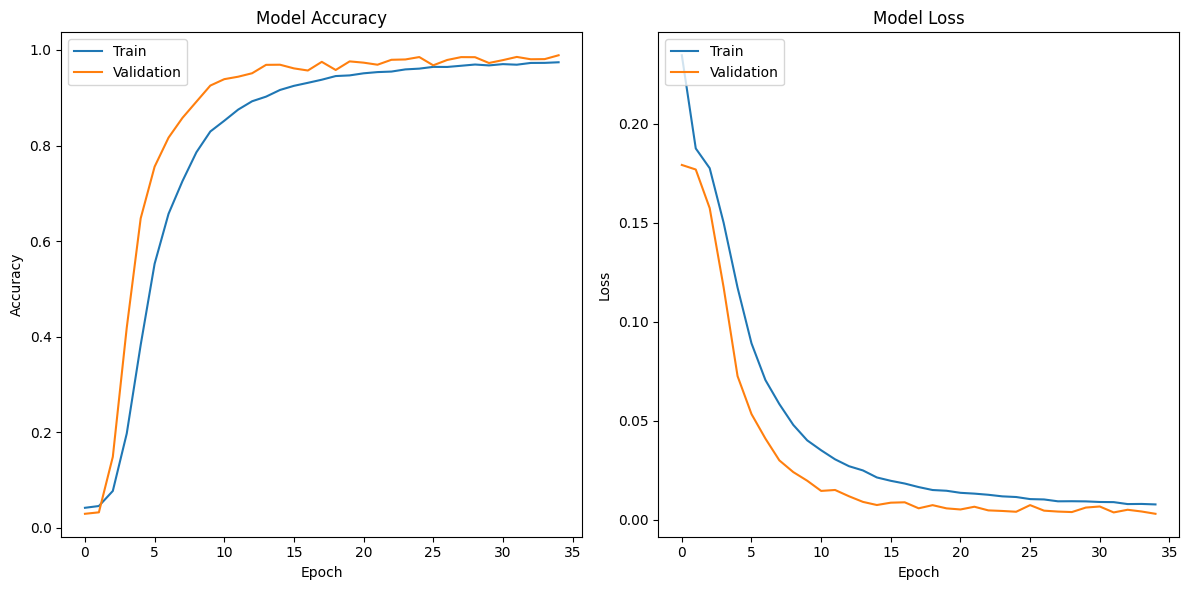

In [19]:
history = model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

# Summarize history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
#
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 12s 86ms/step - loss: 0.0074 - accuracy: 0.9769 - val_loss: 0.0044 - val_accuracy: 0.9840
Epoch 2/35
138/138 [==============================] - 12s 87ms/step - loss: 0.0080 - accuracy: 0.9720 - val_loss: 0.0037 - val_accuracy: 0.9883
Epoch 3/35
138/138 [==============================] - 12s 86ms/step - loss: 0.0074 - accuracy: 0.9757 - val_loss: 0.0040 - val_accuracy: 0.9841
Epoch 4/35
138/138 [==============================] - 12s 85ms/step - loss: 0.0073 - accuracy: 0.9757 - val_loss: 0.0042 - val_accuracy: 0.9760
Epoch 5/35
138/138 [==============================] - 12s 87ms/step - loss: 0.0067 - accuracy: 0.9774 - val_loss: 0.0044 - val_accuracy: 0.9891
Epoch 6/35
138/138 [==============================] - 12s 89ms/step - loss: 0.0067 - accuracy: 0.9773 - val_loss: 0.0027 - val_accuracy: 0.9897
Epoch 7/35
138/138 [==============================] - 12s 91ms/step - loss: 0.0066 - accuracy: 0.9783 - val_loss: 0.0040 - val_accuracy:

## Understanding errors

In [21]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import accuracy_score

num_labels = 24  
label_accuracies = []


for i in range(num_labels):
    indices = np.where(true_classes == i)[0]  # Get indices of each class
    label_accuracy = accuracy_score(true_classes[indices], predicted_classes[indices])
    label_accuracies.append(label_accuracy)


for i, acc in enumerate(label_accuracies):
    print(f"Accuracy for label {i}: {acc * 100:.2f}%")


225/225 [==============================] - 2s 7ms/step
Accuracy for label 0: 100.00%
Accuracy for label 1: 100.00%
Accuracy for label 2: 100.00%
Accuracy for label 3: 100.00%
Accuracy for label 4: 100.00%
Accuracy for label 5: 100.00%
Accuracy for label 6: 95.69%
Accuracy for label 7: 97.02%
Accuracy for label 8: 100.00%
Accuracy for label 9: 99.70%
Accuracy for label 10: 100.00%
Accuracy for label 11: 95.94%
Accuracy for label 12: 100.00%
Accuracy for label 13: 100.00%
Accuracy for label 14: 100.00%
Accuracy for label 15: 100.00%
Accuracy for label 16: 99.31%
Accuracy for label 17: 90.65%
Accuracy for label 18: 91.53%
Accuracy for label 19: 100.00%
Accuracy for label 20: 100.00%
Accuracy for label 21: 100.00%
Accuracy for label 22: 100.00%
Accuracy for label 23: 100.00%


In [22]:
#print the number of unique predicted classes
print(np.unique(predicted_classes))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [23]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [24]:
true_classes

array([6, 5, 9, ..., 2, 4, 2])

In [25]:
pip install opencv-python



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Version 1 of grad-CAM

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


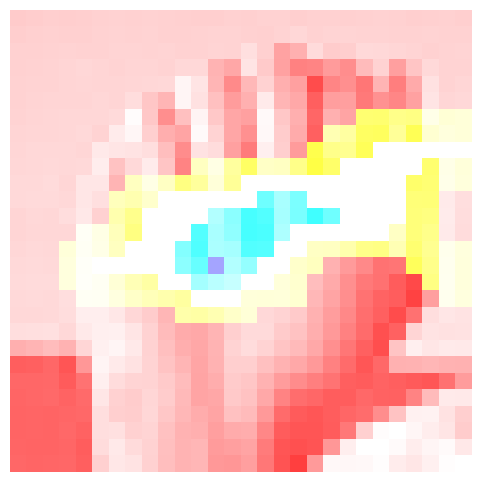

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 



def preprocess_image(image):
    # 
    return image

img = X_test[3]  
img_processed = preprocess_image(img)

#  model that outputs the final conv layer and the original model's output
last_conv_layer_name = 'conv2d_3'  # The name of the last conv layer 
last_conv_layer = model.get_layer(last_conv_layer_name)
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

# Get the gradient of the top predicted class for the selected image
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img_processed]))
    loss = predictions[:, np.argmax(predictions[0])]

# Capture the gradient with respect to the output of the last conv layer
output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

# Weight the channels by the corresponding gradients
weights = tf.reduce_mean(grads, axis=(0, 1))


heatmap = np.dot(output, weights)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Resize heatmap 
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convert heatmap to RGB
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Superimpose the heatmap on original image
superimposed_img = heatmap * 0.4 + img

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


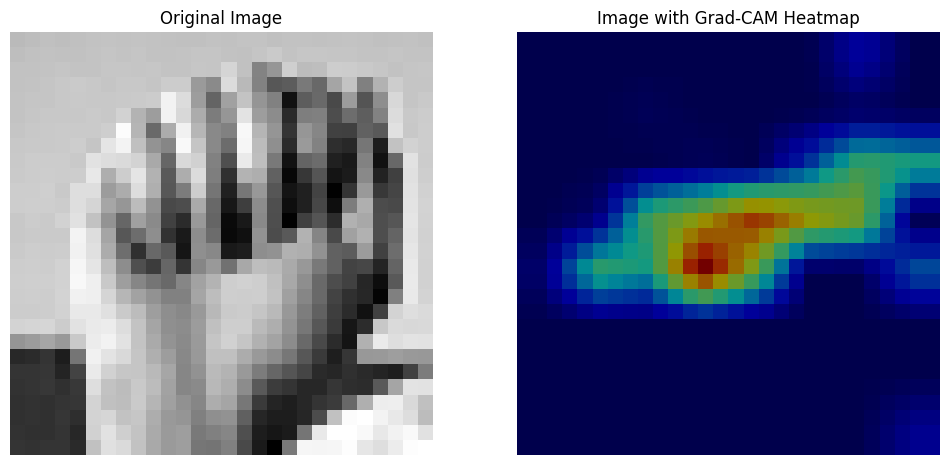

In [30]:
import matplotlib.cm as cm

def preprocess_image(image):
    
    return image


img = X_test[3]  
img_processed = preprocess_image(img)


last_conv_layer_name = 'conv2d_3'  # The name of the last conv layer
last_conv_layer = model.get_layer(last_conv_layer_name)
grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

# Get the gradient of the top predicted class for the selected image
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img_processed]))
    loss = predictions[:, np.argmax(predictions[0])]

# Capture the gradient with respect to the output of the last conv layer
output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

# Weight the channels by the corresponding gradients
weights = tf.reduce_mean(grads, axis=(0, 1))


heatmap = np.dot(output, weights)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Normalize the heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Create an RGB version of the grayscale img for visualization
if img.ndim == 2:  
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
else:
    img_rgb = img.copy()

# Resize the heatmap to the size of the original image
heatmap_resized = cv2.resize(heatmap, (img_rgb.shape[1], img_rgb.shape[0]))

# Convert heatmap to RGB
heatmap_rgb = cm.jet(heatmap_resized)[:, :, :3] * 255

# Superimpose the heatmap onto the original image
superimposed_img = heatmap_rgb * 0.6 + img_rgb * 0.4
superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

# Display the original image and the heatmap
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Image with heatmap
plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('Image with Grad-CAM Heatmap')
plt.axis('off')

plt.show()
